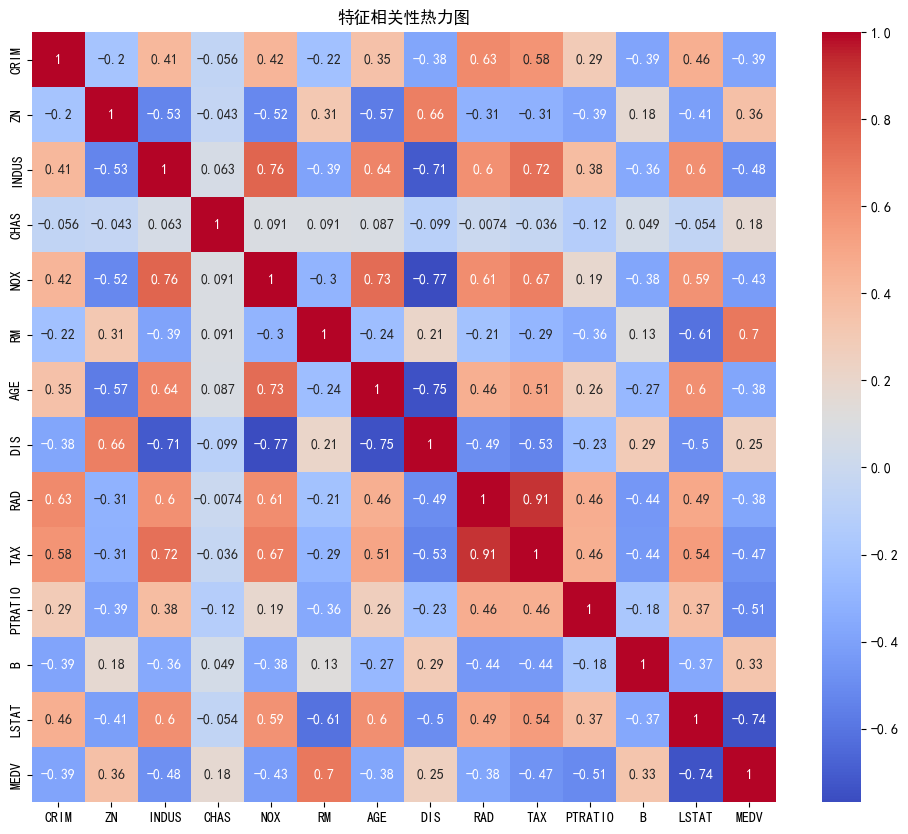

选出的特征： ['RM', 'PTRATIO', 'LSTAT']
线性回归模型 MSE: 11.9909
神经网络模型 MSE: 12.3801


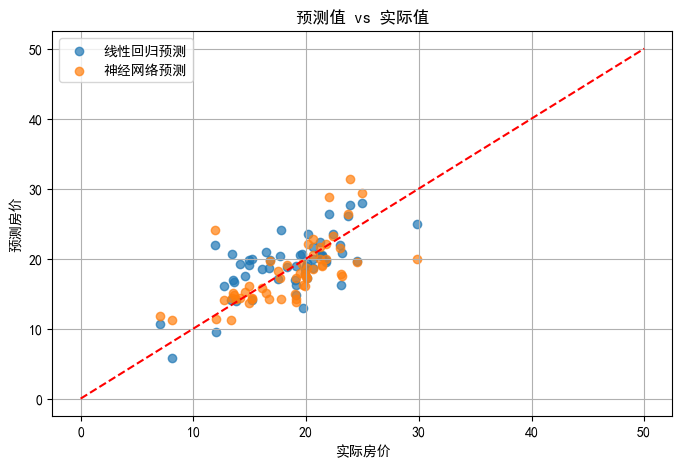

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

# Boston Housing Price Regression Analysis

#  1. 数据导入和基本查看
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim

# 读取数据
data = pd.read_excel("C:\\Users\\Riema\\Downloads\\BostonHousingData.xlsx")

# 查看前几行数据
data.head()

#  2. 特征相关性分析（相关系数 + 热力图）
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("特征相关性热力图")
plt.show()

# 选择与 MEDV 相关性大的特征（绝对值 > 0.5）
corr = data.corr()['MEDV'].sort_values(ascending=False)
selected_features = corr[abs(corr) > 0.5].index.tolist()
selected_features.remove('MEDV')
print("选出的特征：", selected_features)

#  3. 数据划分（前450条为训练集，后50条为测试集）
train_data = data.iloc[:450]
test_data = data.iloc[450:]

X_train = train_data[selected_features]
y_train = train_data['MEDV']
X_test = test_data[selected_features]
y_test = test_data['MEDV']

# 标准化（神经网络部分会用到）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  4. 线性回归模型
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lr = linreg.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"线性回归模型 MSE: {mse_lr:.4f}")

#  5. 神经网络模型（使用 PyTorch）
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1,1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1,1)

model = nn.Sequential(
    nn.Linear(len(selected_features), 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 训练模型
for epoch in range(500):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()

# 测试模型
model.eval()
with torch.no_grad():
    y_pred_nn = model(X_test_tensor)
    mse_nn = loss_fn(y_pred_nn, y_test_tensor).item()
    print(f"神经网络模型 MSE: {mse_nn:.4f}")

#  6. 可视化预测效果
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, label="线性回归预测", alpha=0.7)
plt.scatter(y_test, y_pred_nn.numpy(), label="神经网络预测", alpha=0.7)
plt.plot([0, 50], [0, 50], 'r--')
plt.xlabel("实际房价")
plt.ylabel("预测房价")
plt.title("预测值 vs 实际值")
plt.legend()
plt.grid(True)
plt.show()

##  7. 实验总结与结论

### 📊 特征选择分析结论
根据特征与房价（MEDV）之间的相关性热力图，我们发现以下三个特征与房价的相关性较强：
- `RM`（平均房间数）：正相关系数为 0.7，说明房间越多房价越高；
- `LSTAT`（低收入人口比例）：负相关系数为 -0.74，说明低收入人群比例越高，房价越低；
- `PTRATIO`（学生-教师比例）：负相关系数为 -0.51，也对房价有中度负面影响。

因此我们最终选择了这三个特征作为回归模型的输入变量。

### 🧠 模型性能分析
| 模型类型       | 均方误差（MSE） |
|----------------|------------------|
| 线性回归模型   | 11.9990          |
| 神经网络模型   | 12.3801          |

- 从结果可以看出，线性回归略优于神经网络；
- 可能原因是：当前特征维度较少，数据结构简单，神经网络的优势未能体现；
- 神经网络在特征复杂或非线性数据场景中可能更具优势。

### 📈 可视化效果解读
- 大多数预测点集中在理想预测线附近，说明模型预测基本准确；
- 部分数据点存在偏差，可能与数据中的噪声或漏掉的关键特征有关；
- 两种模型的表现相近，线性模型在本数据集上已经具备良好性能。

### 总结
- 成功完成波士顿房价预测任务，验证了线性回归和神经网络模型的性能；
- 特征选择对建模效果影响较大，良好的特征选择可提升模型表现；
- 若要进一步优化，可以考虑加入更多复杂特征或使用集成模型方法（如随机森林、XGBoost 等）。
